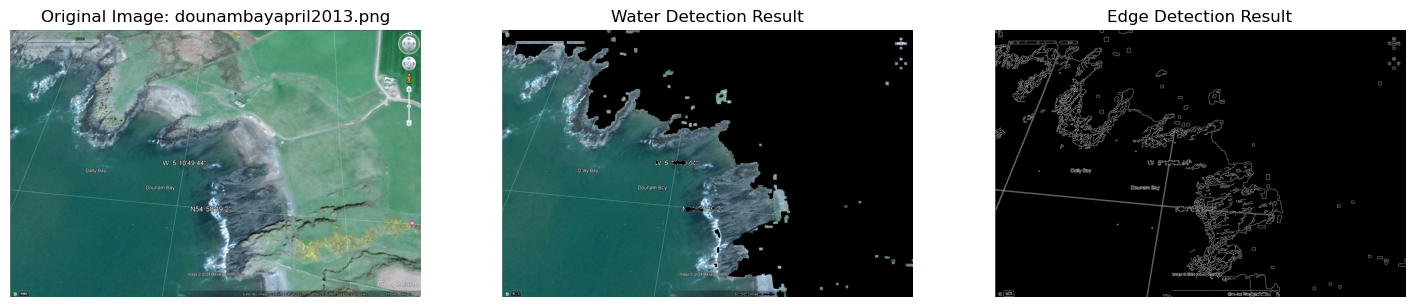

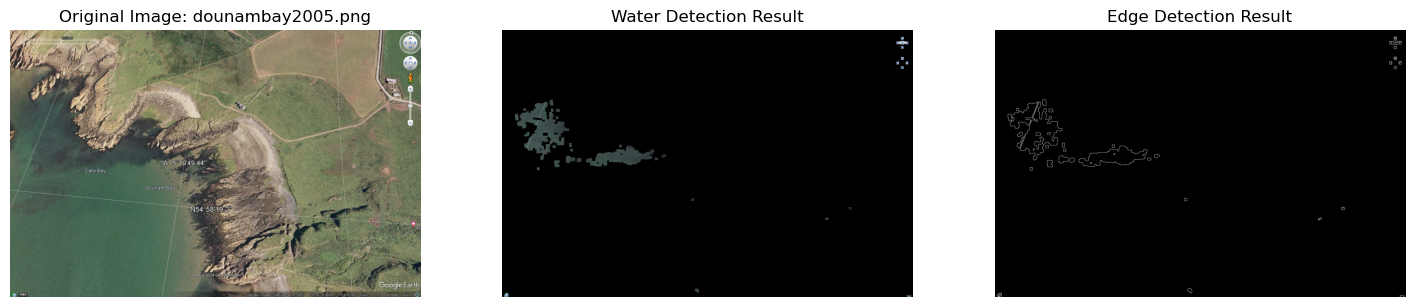

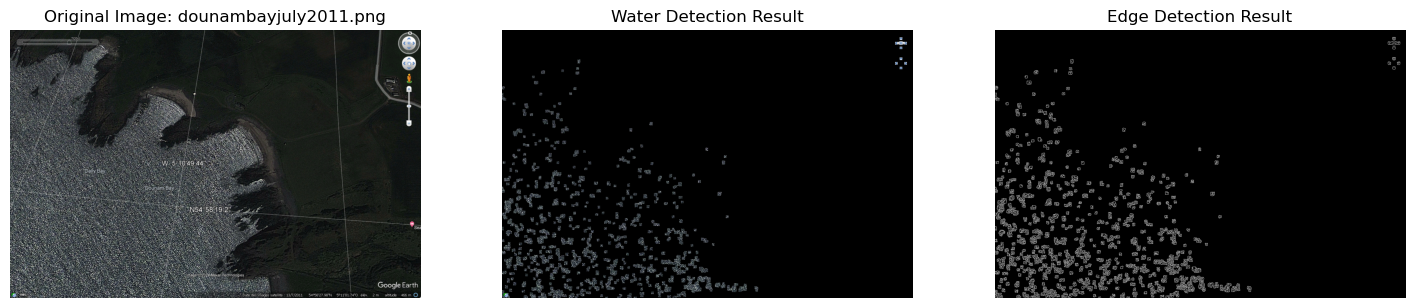

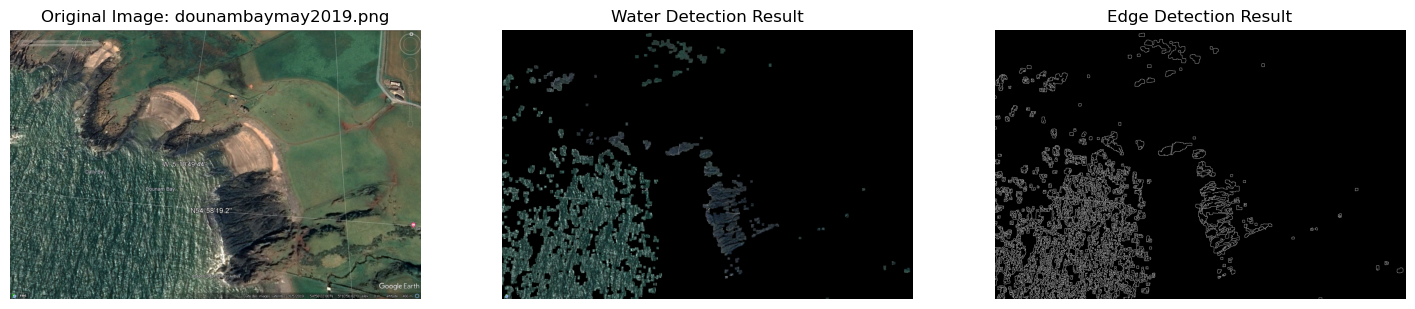

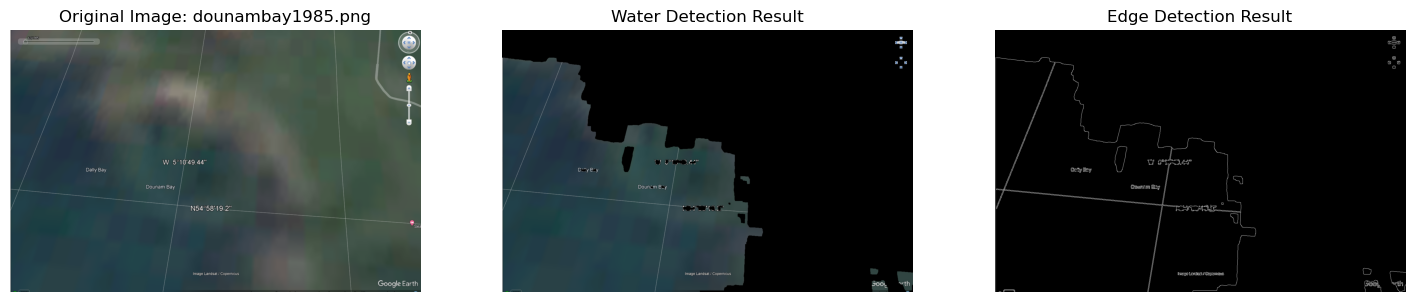

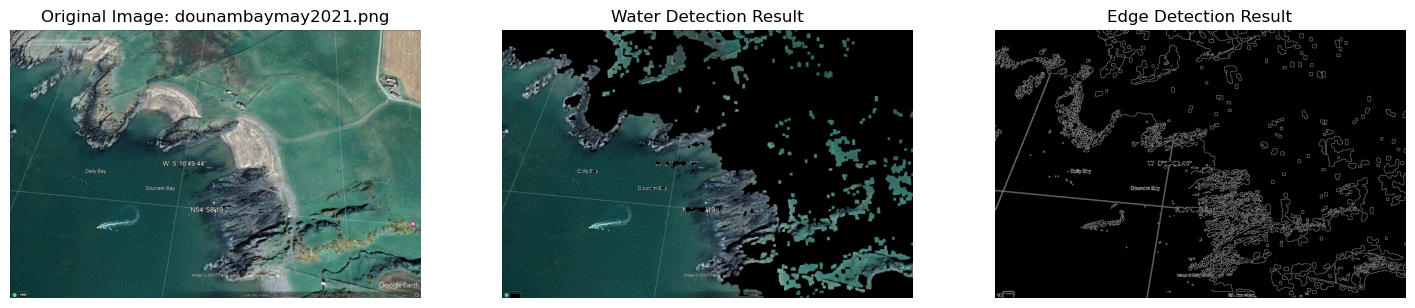

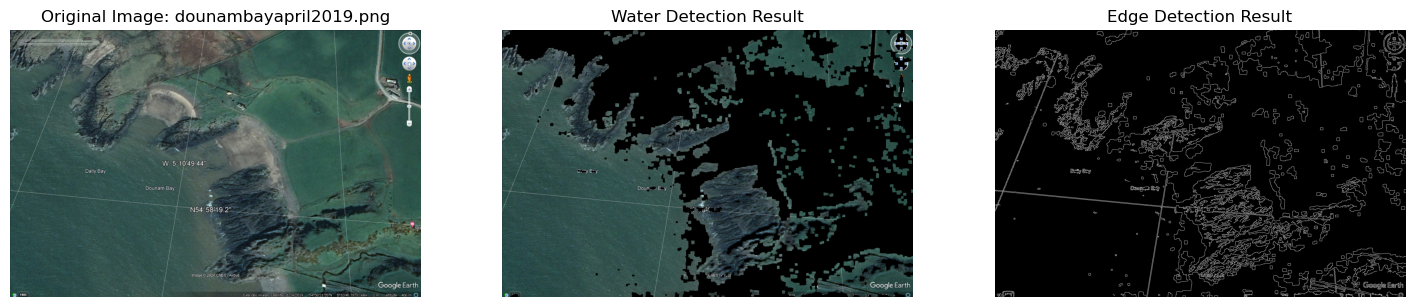

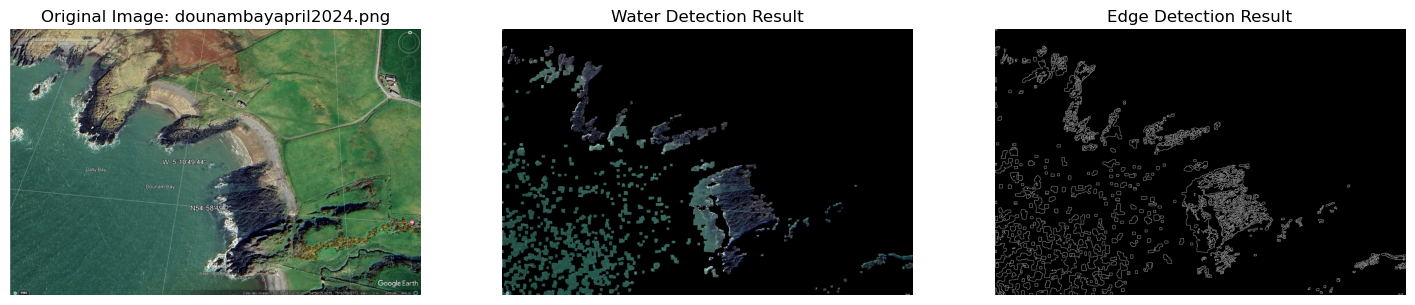

In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import glob

# Function to process a single image
def process_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display with matplotlib

    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

    # Define the range for blue color in HSV
    lower_blue1 = np.array([85, 50, 50])
    upper_blue1 = np.array([135, 255, 255])

    lower_blue2 = np.array([85, 50, 50])
    upper_blue2 = np.array([110, 255, 255])

    lower_blue3 = np.array([90, 50, 50])
    upper_blue3 = np.array([140, 255, 255])

    # Create masks for the different blue ranges
    mask_blue1 = cv2.inRange(hsv_image, lower_blue1, upper_blue1)
    mask_blue2 = cv2.inRange(hsv_image, lower_blue2, upper_blue2)
    mask_blue3 = cv2.inRange(hsv_image, lower_blue3, upper_blue3)

    # Combine the masks
    mask_water = cv2.bitwise_or(mask_blue1, mask_blue2)
    mask_water = cv2.bitwise_or(mask_water, mask_blue3)

    # Apply morphological operations to clean up the mask
    kernel = np.ones((5, 5), np.uint8)
    mask_cleaned = cv2.morphologyEx(mask_water, cv2.MORPH_CLOSE, kernel)
    mask_cleaned = cv2.morphologyEx(mask_cleaned, cv2.MORPH_OPEN, kernel)
    mask_cleaned = cv2.dilate(mask_cleaned, kernel, iterations=2)  # Additional dilation step
    mask_cleaned = cv2.erode(mask_cleaned, kernel, iterations=1)  # Erosion to refine edges

    # Apply the cleaned mask to get the result
    result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_cleaned)

    # Convert the result to grayscale for edge detection
    gray_result = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray_result, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 30, 100)  # Adjusted thresholds

    # Display the original image, water detection result, and edge detection result
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.title(f'Original Image: {os.path.basename(image_path)}')
    plt.imshow(image_rgb)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Water Detection Result')
    plt.imshow(result)
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Edge Detection Result')
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    plt.show()

    # Save the edge detection result as a reference image in new data
    output_dir = "../newdata/reference_image_generate/"
    os.makedirs(output_dir, exist_ok=True)
    output_path = os.path.join(output_dir, os.path.basename(image_path).replace(".png", "_reference_edge_detection.png"))
    cv2.imwrite(output_path, edges)

# Process all images in the directory
image_paths = glob.glob("../newdata/*.png")

for image_path in image_paths:
    process_image(image_path)
